insert /home/michiel/WUR/PCSE-Gym


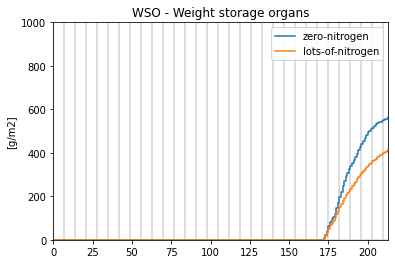

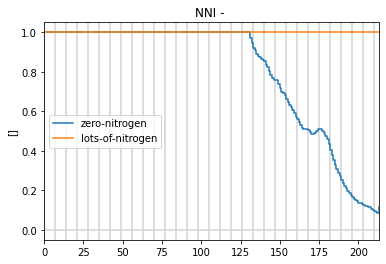

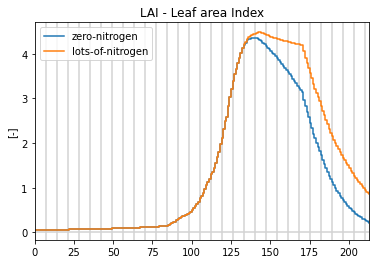

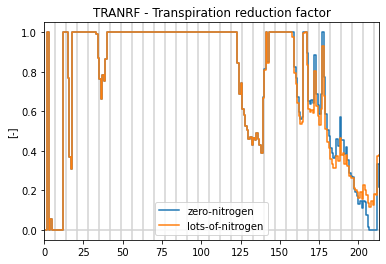

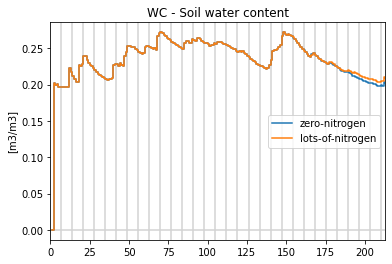

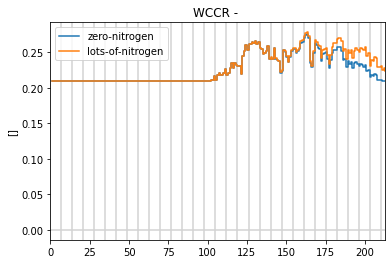

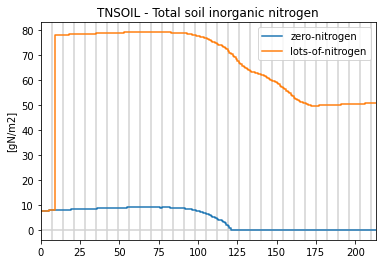

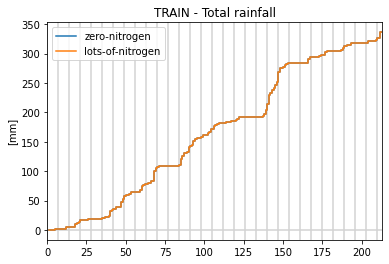

In [7]:
import os
import sys
import ipynbname
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
import matplotlib.pyplot as plt

rootdir = ipynbname.path().parents[2]

if rootdir not in sys.path:
    print(f'insert {os.path.join(rootdir)}')
    sys.path.insert(0, os.path.join(rootdir))
from helper import train, determine_and_log_optimum, evaluate_policy, plot_variable, get_ylim_dict
from wrapper import ReferenceEnv, get_default_crop_features, get_default_weather_features, get_default_train_years, get_default_test_years


costs_nitrogen = 10.0
test_year = 2006
env_test = ReferenceEnv(costs_nitrogen=costs_nitrogen, years=test_year)
env_test = VecNormalize(DummyVecEnv([lambda: env_test]), norm_obs=True, norm_reward=False, clip_obs=10., gamma=1)

_, results_zero_nitrogen = evaluate_policy('start-dump', env_test, amount=0)
_, results_100_nitrogen = evaluate_policy('start-dump', env_test, amount=100)

variables = 'WSO', 'NNI', 'LAI', 'TRANRF', 'WC', 'WCCR', 'TNSOIL', 'TRAIN' 
result_model = {'zero-nitrogen': results_zero_nitrogen, 'lots-of-nitrogen': results_100_nitrogen}


for i, variable in enumerate(variables):
    fig, ax = plt.subplots()
    plot_variable(result_model, variable=variable, ax=ax, ylim=get_ylim_dict()[variable])
    plt.show()    

In [2]:
print(result_model['zero-nitrogen'][0].keys())

dict_keys(['NNI', 'NFGMR', 'NRMR', 'NOPTMR', 'NUPTTr', 'TNSOILr', 'TGROWTHr', 'DVS', 'DVR', 'TRANSL', 'TGROWTH', 'LAI', 'NUPTT', 'TRAN', 'TIRRIG', 'TNSOIL', 'TRAIN', 'TRANRF', 'TRUNOF', 'TAGBM', 'TTRAN', 'WC', 'WLVD', 'WLVG', 'WRT', 'WSO', 'WST', 'WCCR', 'FR', 'PTRANM', 'FSO', 'IRRAD', 'TMIN', 'TMAX', 'VAP', 'RAIN', 'E0', 'ES0', 'ET0', 'WIND', 'action', 'fertilizer', 'reward', 'growth'])


In [124]:
water_stress={}
for d in result_model['zero-nitrogen'][0]['NNI']:
    NNI = result_model['zero-nitrogen'][0]['NNI'][d]
    TRANRF = result_model['zero-nitrogen'][0]['TRANRF'][d]
    if TRANRF  <=  NNI:
        water_stress[d] = 1
    else:
        water_stress[d] = 0
result_model['zero-nitrogen'][0]['water_stress']=water_stress

<AxesSubplot:title={'center':'LAI - Leaf area Index'}, ylabel='[-]'>

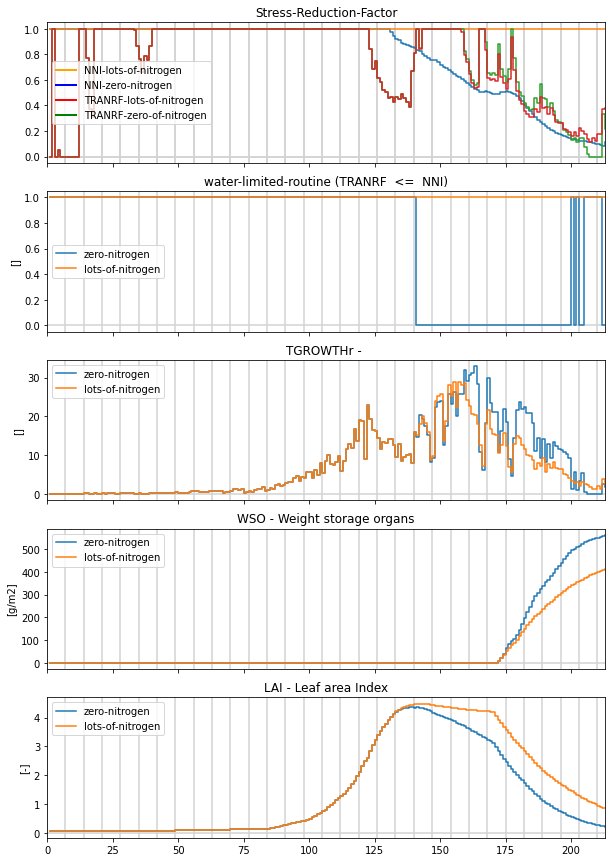

In [125]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
fig, ax = plt.subplots(5, 1, sharex=True, figsize=(10,15))
plot_variable(result_model, variable='NNI', ax=ax[0], put_legend=False)
plot_variable(result_model, variable='TRANRF', ax=ax[0], put_legend=False)
ax[0].set_title('Stress-Reduction-Factor')
ax[0].set_ylabel(f"")
legend_elements = [Line2D([0], [0], color='orange', lw=2, label='NNI-lots-of-nitrogen'),\
                   Line2D([0], [0], color='blue', lw=2, label='NNI-zero-nitrogen'),\
                   Line2D([0], [0], color='red', lw=2, label='TRANRF-lots-of-nitrogen'),\
                   Line2D([0], [0], color='green', lw=2, label='TRANRF-zero-of-nitrogen')
                  ]
ax[0].legend(handles=legend_elements)
plot_variable(result_model, variable='water_stress', ax=ax[1], put_legend=True)
ax[1].set_title('water-limited-routine (TRANRF  <=  NNI)')
plot_variable(result_model, variable='TGROWTHr', ax=ax[2], put_legend=True)
plot_variable(result_model, variable='WSO', ax=ax[3], put_legend=True)
plot_variable(result_model, variable='LAI', ax=ax[4], put_legend=True)